# Twende

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data_frame= pd.read_csv('data_frame/data.csv')
data_frame=data_frame.drop(index=data_frame.index[-1])
# data_frame=data_frame[['Event name']].replace(['Twende kumasi','Twende Build It','The Innovation Week'],[1,2,3])

In [3]:
df_encoded = pd.get_dummies(data_frame, columns=['Event name', 'Location'])
df_encoded=df_encoded.astype(np.float32)
df_encoded

,Venue cost,Number of Facilitators,Equipments Cost,Food and Beverage Cost,Accommodations Cost,Marketing and Advertising Cost,Duration(days),Transportation&Communication Cost,Guest of honor Cost,Staff&Volunteer Expenses,...,Location_Mbeya,Location_Morogoro,Location_Mwanza,Location_Pwani,Location_Rukwa,Location_Singida,Location_Songea,Location_Tabora,Location_Tanga,Location_Zanzibar
0,5500000.0,3.0,1800000.0,1080000.0,450000.0,4500000.0,6.0,1070000.0,150000.0,250000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2800000.0,4.0,2800000.0,1680000.0,840000.0,3000000.0,7.0,1000000.0,0.0,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1800000.0,2.0,900000.0,120000.0,120000.0,2500000.0,1.0,2300000.0,0.0,550000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4500000.0,3.0,3500000.0,360000.0,180000.0,5000000.0,3.0,600000.0,150000.0,500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000000.0,5.0,1000000.0,3300000.0,1650000.0,2500000.0,8.0,2450000.0,100000.0,350000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2100000.0,5.0,2200000.0,3000000.0,1500000.0,2500000.0,10.0,2900000.0,75000.0,550000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,9000000.0,10.0,2000000.0,3840000.0,1920000.0,1500000.0,8.0,800000.0,180000.0,700000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,1400000.0,2.0,1000000.0,240000.0,60000.0,2000000.0,1.0,2300000.0,150000.0,500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,2500000.0,11.0,1400000.0,7800000.0,4050000.0,2400000.0,11.0,920000.0,150000.0,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Venue cost                                           499 non-null    float32
 1   Number of Facilitators                               499 non-null    float32
 2   Equipments Cost                                      499 non-null    float32
 3   Food and Beverage Cost                               499 non-null    float32
 4   Accommodations Cost                                  499 non-null    float32
 5   Marketing and Advertising Cost                       499 non-null    float32
 6   Duration(days)                                       499 non-null    float32
 7   Transportation&Communication Cost                    499 non-null    float32
 8   Guest of honor Cost                                  499 non-null    f

In [5]:
df_encoded.tail()

,Venue cost,Number of Facilitators,Equipments Cost,Food and Beverage Cost,Accommodations Cost,Marketing and Advertising Cost,Duration(days),Transportation&Communication Cost,Guest of honor Cost,Staff&Volunteer Expenses,...,Location_Mbeya,Location_Morogoro,Location_Mwanza,Location_Pwani,Location_Rukwa,Location_Singida,Location_Songea,Location_Tabora,Location_Tanga,Location_Zanzibar
494,2100000.0,5.0,2200000.0,3000000.0,1500000.0,2500000.0,10.0,2900000.0,75000.0,550000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,9000000.0,10.0,2000000.0,3840000.0,1920000.0,1500000.0,8.0,800000.0,180000.0,700000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,1400000.0,2.0,1000000.0,240000.0,60000.0,2000000.0,1.0,2300000.0,150000.0,500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,2500000.0,11.0,1400000.0,7800000.0,4050000.0,2400000.0,11.0,920000.0,150000.0,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,3000000.0,10.0,1000000.0,3780000.0,1800000.0,4000000.0,7.0,2000000.0,0.0,200000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_encoded.describe()

,Venue cost,Number of Facilitators,Equipments Cost,Food and Beverage Cost,Accommodations Cost,Marketing and Advertising Cost,Duration(days),Transportation&Communication Cost,Guest of honor Cost,Staff&Volunteer Expenses,...,Location_Mbeya,Location_Morogoro,Location_Mwanza,Location_Pwani,Location_Rukwa,Location_Singida,Location_Songea,Location_Tabora,Location_Tanga,Location_Zanzibar
count,499.0,499.000000,4.990000e+02,499.0,499.000,499.00,499.000000,499.000,499.000000,499.0000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2712025.5,5.312625,1.138377e+06,2353908.0,1258397.250,3219040.75,6.887775,1735150.375,120861.726562,367535.0625,...,0.076152,0.018036,0.044088,0.046092,0.002004,0.018036,0.016032,0.130261,0.030060,0.010020
std,1774104.5,2.750397,5.910178e+05,2003578.0,1074392.375,1705606.00,3.808073,1151367.500,107490.351562,192066.8125,...,0.265507,0.133215,0.205497,0.209896,0.044766,0.133215,0.125725,0.336928,0.170924,0.099697
min,200000.0,1.000000,3.000000e+05,120000.0,60000.000,500000.00,1.000000,150000.000,0.000000,50000.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400000.0,3.000000,7.000000e+05,840000.0,420000.000,2000000.00,4.000000,970000.000,0.000000,150000.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2400000.0,5.000000,1.000000e+06,1680000.0,980000.000,2600000.00,6.000000,1500000.000,100000.000000,400000.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3500000.0,7.000000,1.450000e+06,3600000.0,1905000.000,4500000.00,9.000000,2400000.000,200000.000000,500000.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9000000.0,12.000000,3.500000e+06,9000000.0,6000000.000,7000000.00,15.000000,5500000.000,400000.000000,750000.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Scatter plot for estimated cost and Venue cost

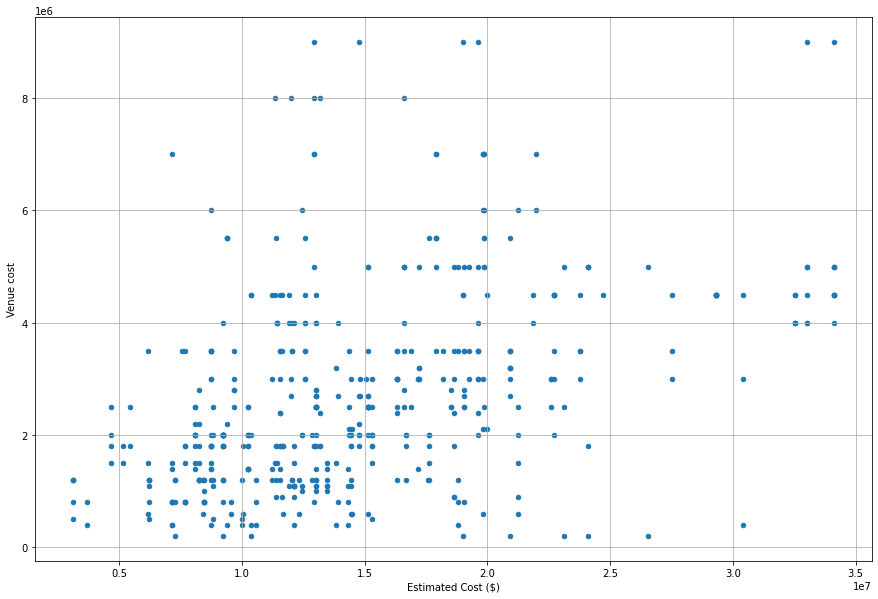

In [7]:
df_encoded.plot(kind='scatter',figsize=(15,10),x="Estimated Cost ($)",y='Venue cost')
plt.grid()
plt.show()

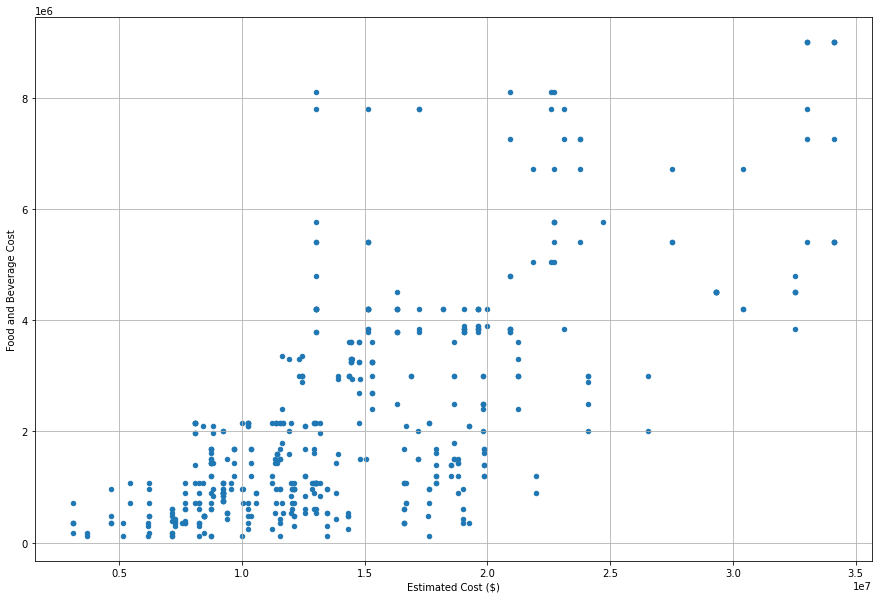

In [8]:
data_frame.plot(kind='scatter',figsize=(15,10),x="Estimated Cost ($)",y='Food and Beverage Cost')
plt.grid()
plt.show()

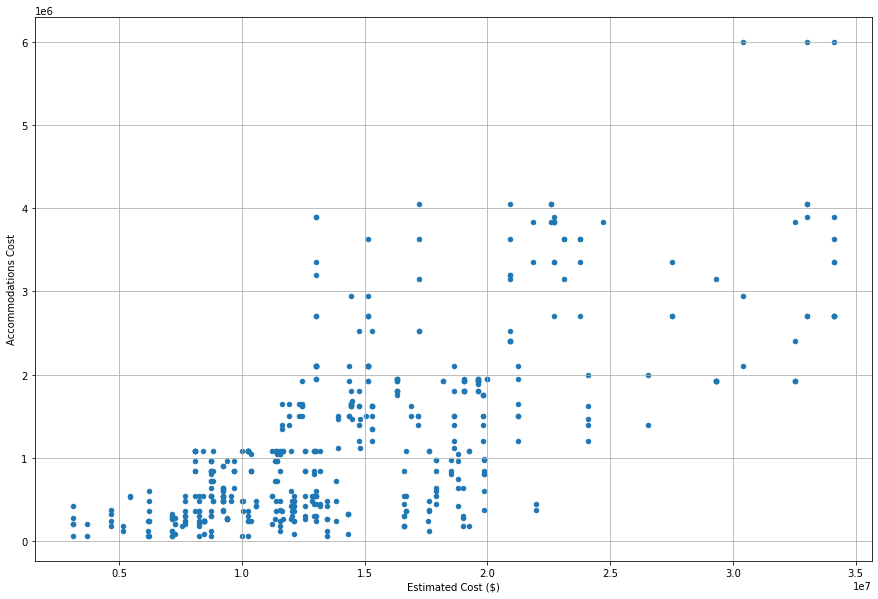

In [9]:
df_encoded.plot(kind='scatter',figsize=(15,10),x="Estimated Cost ($)",y='Accommodations Cost')
plt.grid()
plt.show()

# Training model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


# Define hyperparameters
input_dim = 51  # number of input variables
output_dim = 1  # number of output variables
hidden_dim = 30  # number of neurons in the hidden layer
num_epochs = 50  # number of epochs to train the model
batch_size = 100  # size of batch for each epoch
learning_rate = 0.01  # learning rate for the optimizer


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

# Split the data into input (X) and output (y) variables
X = df_encoded.drop(columns='Estimated Cost ($)')
y = df_encoded['Estimated Cost ($)']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [19]:
# Create the model architecture
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
# Compile the model
model.compile(loss='mape', optimizer=Adam(lr=learning_rate), metrics=['mape'])

# Train the model on the training data
history = model.fit(X_train, y_train,epochs=num_epochs,batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/50


/home/ombeni/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 58ms/step - loss: 96.7900 - mape: 96.7900 - val_loss: 85.7623 - val_mape: 85.7623
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 77.5379 - mape: 77.5379 - val_loss: 44.7388 - val_mape: 44.7388
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 38.0858 - mape: 38.0858 - val_loss: 32.7297 - val_mape: 32.7297
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 40.8267 - mape: 40.8267 - val_loss: 21.9590 - val_mape: 21.9590
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 32.4941 - mape: 32.4941 - val_loss: 29.8427 - val_mape: 29.8427
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 35.6698 - mape: 35.6698 - val_loss: 25.9177 - val_mape: 25.9177
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 30.6888 - mape: 30.6888 - val_loss: 21.1827 - val_mape: 21.1827
Epoch 8/50
4/4 [==============================] - 0s 14ms/step - l

# Model predication

In [13]:
#predict values using the trained model
predictions = model.predict(X_test)

# Predicted value against real value

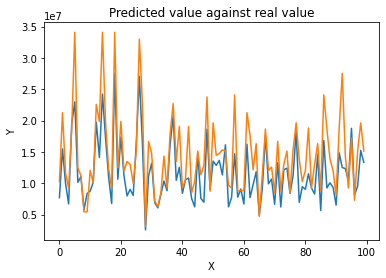

In [14]:
# create the plot

y_test=np.array(y_test)
plt.plot(predictions)
plt.plot(y_test)

# set the axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Predicted value against real value')
# display the plot
plt.show()

In [15]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 20.630504608154297
Validation accuracy: 20.630504608154297


In [16]:
X_test=X_test.head()

In [17]:
predictions = model.predict(X_test)
predictions

array([[ 7699997.5],
       [15468429. ],
       [ 9933736. ],
       [ 6688258.5],
       [19486188. ]], dtype=float32)

In [18]:
y_test

array([10265000., 21250000., 11630000.,  9225000., 18650000., 34100000.,
       12450000., 11210000.,  5430000.,  5430000., 12060000., 10030000.,
       22590000., 19865000., 34100000., 19810000., 12330000.,  9225000.,
       34100000., 12450000., 19865000., 11910000., 13470000., 13010000.,
        9990000., 15125000., 33000000., 22700000.,  3110000., 16680000.,
       14760000.,  7170000.,  6240000.,  8470000., 14330000.,  9225000.,
       17920000., 22700000., 13470000., 19060000.,  9225000., 10580000.,
       19060000.,  8470000., 10265000., 15125000., 11340000., 12840000.,
       23770000.,  8730000., 19640000., 14450000., 14760000., 15320000.,
       15125000.,  9680000.,  9225000., 24100000.,  8730000.,  8840000.,
        8840000., 21250000., 17640000., 12145000., 16310000.,  4690000.,
       11390000., 18650000., 12060000., 12570000.,  8470000., 16680000.,
        8730000., 13020000., 15125000.,  8470000., 15320000., 19640000.,
       13820000., 10265000., 12020000., 18820000., 

In [20]:
model.save('Twende')

INFO:tensorflow:Assets written to: Twende/assets


In [32]:
loaded_model = tf.keras.models.load_model('Twende/assets')

# make predictions on new data
predict = loaded_model.predict(X_test)
predict

array([[ 8587093.],
       [17068330.],
       [10562551.],
       [ 7196154.],
       [21128808.]], dtype=float32)